In [1]:
import sys
sys.path.append('../')

import utils
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pandas as pd

plt.style.use('../style.mpl')

In [2]:
G = utils.load_network(path="../data/network.pkl")
print(G)

Graph with 780 nodes and 30052 edges


# Group of nodes

## Cliques
In this section, we explore the concept of **cliques** within the Spotify artist collaboration network. A clique is a subset of nodes where every artist is directly connected to every other artist in the group, forming a completely connected subgraph. These structures often reveal strong collaboration ties or overlapping audience segments among artists.

Network Info:
- Nodes: 780
- Edges: 30052

========== CLIQUE ANALYSIS ==========
Total number of cliques: 276
Largest clique size: 98
Average clique size: 12.89

Clique size distribution:
Cliques of size 4: 6
Cliques of size 5: 6
Cliques of size 6: 40
Cliques of size 7: 19
Cliques of size 8: 23
Cliques of size 9: 38
Cliques of size 10: 24
Cliques of size 11: 17
Cliques of size 12: 22
Cliques of size 13: 13
Cliques of size 14: 14
Cliques of size 15: 11
Cliques of size 16: 10
Cliques of size 17: 11
Cliques of size 18: 2
Cliques of size 20: 1
Cliques of size 21: 2
Cliques of size 25: 1
Cliques of size 26: 1
Cliques of size 27: 2
Cliques of size 33: 1
Cliques of size 34: 1
Cliques of size 35: 1
Cliques of size 42: 1
Cliques of size 51: 1
Cliques of size 67: 1
Cliques of size 72: 1
Cliques of size 74: 1
Cliques of size 80: 1
Cliques of size 81: 1
Cliques of size 82: 1
Cliques of size 84: 1
Cliques of size 98: 1


/var/folders/sl/k6wcvvzj05gfs43df8blb4qh0000gn/T/ipykernel_42267/3688507457.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(size_counts.keys()), y=list(size_counts.values()), ax=ax, palette="viridis")


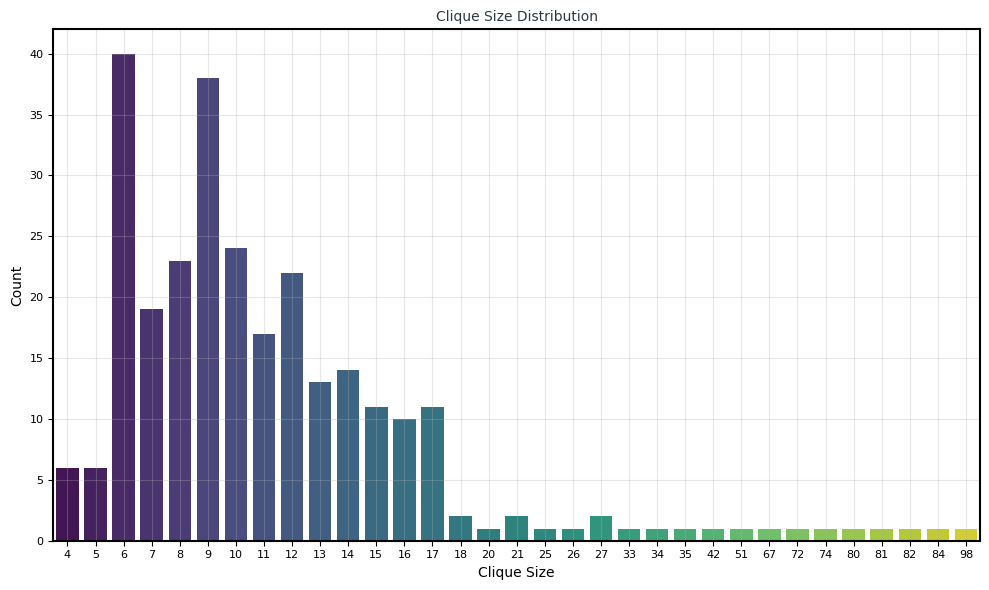


Number of cliques with at least 5 nodes: 270

Largest clique contains 98 artists.


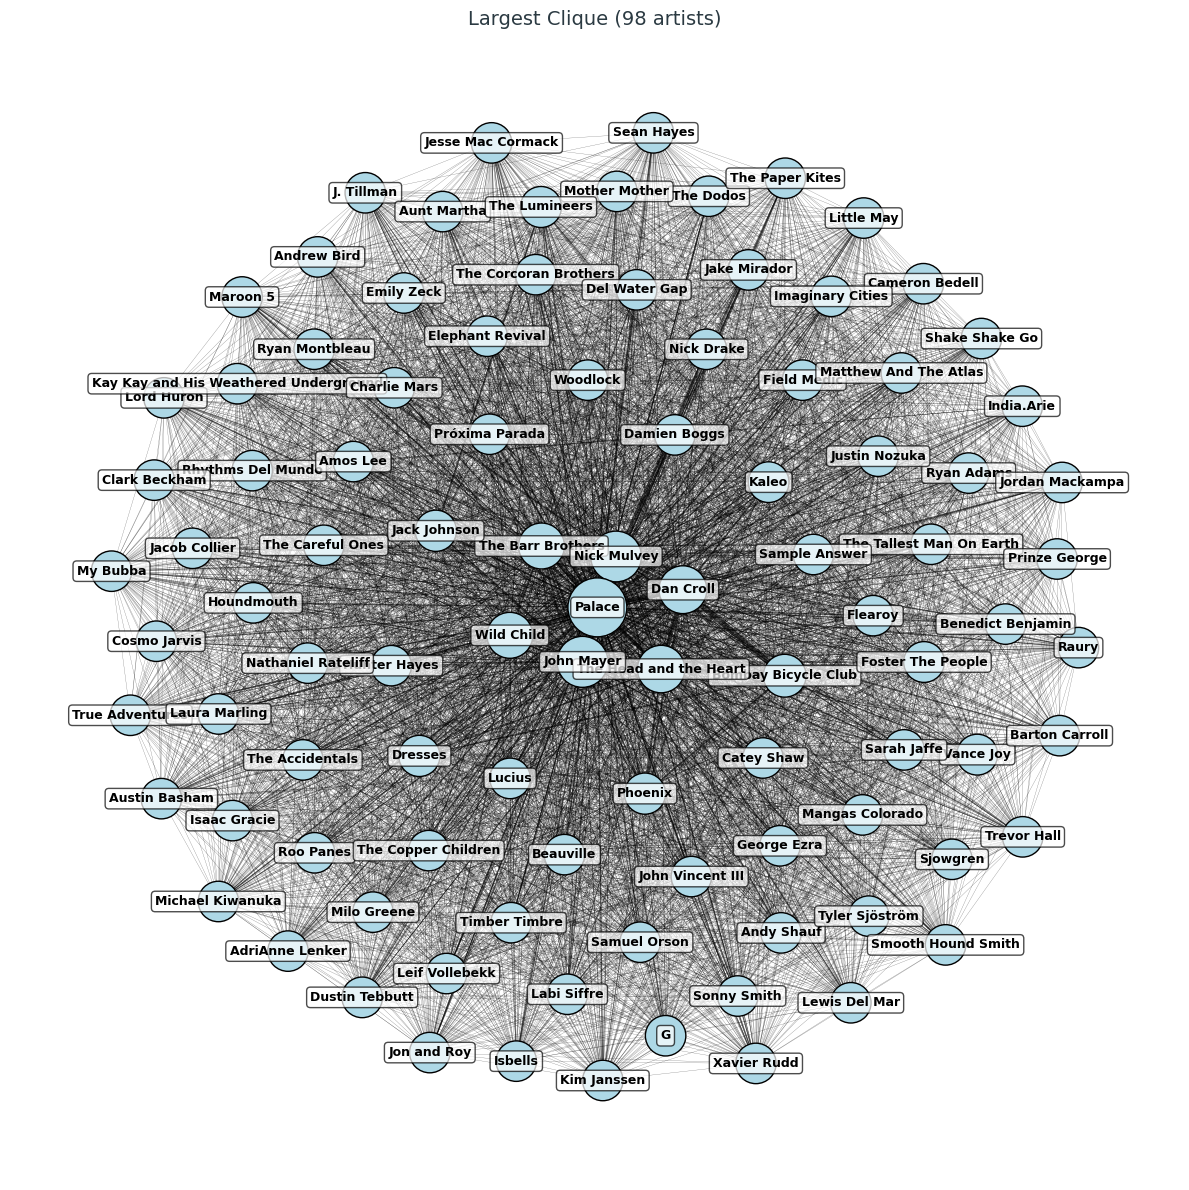


Top 20 artists by clique number:
                     Number of Cliques
Rihanna                            189
Vance Joy                          177
Twenty One Pilots                  101
Fall Out Boy                        72
Beyoncé                             64
Ed Sheeran                          64
Paramore                            62
Troye Sivan                         60
Bastille                            58
Coldplay                            55
Panic! At The Disco                 54
Ruth B.                             54
P!nk                                52
Imagine Dragons                     51
Lady Gaga                           49
Maroon 5                            49
Meghan Trainor                      46
Keane                               42
Jack Johnson                        37
Kings of Leon                       36


/var/folders/sl/k6wcvvzj05gfs43df8blb4qh0000gn/T/ipykernel_42267/3688507457.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_clique_artists['Number of Cliques'], y=top_clique_artists.index, palette="viridis")


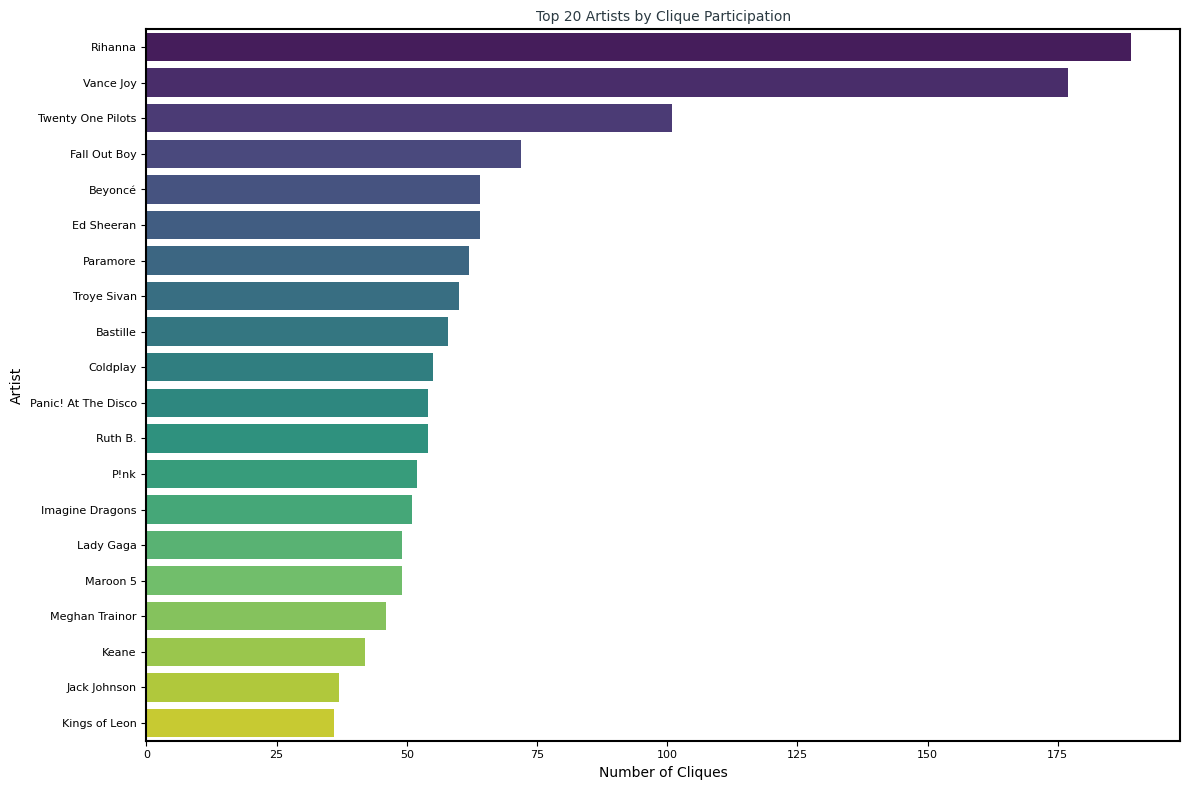

In [ ]:
plt.style.use('../style.mpl')

# Load the network
G = utils.load_network(path="../data/network.pkl")
print(f"Network Info:\n- Nodes: {G.number_of_nodes()}\n- Edges: {G.number_of_edges()}")

# 1. Clique Analysis
print("\n========== CLIQUE ANALYSIS ==========")


# Now we detect cliques in the filtered (unweighted) graph
cliques = list(nx.find_cliques(G))

# cliques = list(nx.find_cliques(G))

# Analyze clique sizes
clique_sizes = [len(c) for c in cliques]
print(f"Total number of cliques: {len(cliques)}")
print(f"Largest clique size: {max(clique_sizes)}")
print(f"Average clique size: {sum(clique_sizes) / len(clique_sizes):.2f}")

# Count frequency of each clique size
size_counts = Counter(clique_sizes)
print("\nClique size distribution:")
for size, count in sorted(size_counts.items()):
    print(f"Cliques of size {size}: {count}")

# Create a figure with 2 subplots (distribution and top artists)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Distribution of clique sizes
sns.barplot(x=list(size_counts.keys()), y=list(size_counts.values()), ax=axes[0], 
            hue=list(size_counts.keys()), palette="viridis", legend=False)
axes[0].set_xlabel('Clique Size')
axes[0].set_ylabel('Count')
axes[0].set_title('Clique Size Distribution')
axes[0].grid(True, alpha=0.3)

# 2. Analysis of largest k-cliques
k = 5  # Threshold for large cliques
large_cliques = [c for c in cliques if len(c) >= k]
print(f"\nNumber of cliques with at least {k} nodes: {len(large_cliques)}")

if large_cliques:
    # Select and visualize the largest clique
    largest_clique = max(cliques, key=len)
    print(f"\nLargest clique contains {len(largest_clique)} artists.")
    largest_clique_subgraph = G.subgraph(largest_clique)

# 3. Clique number per node
node_clique_number = nx.node_clique_number(G)

# Create DataFrame for top nodes
df_clique_numbers = pd.DataFrame.from_dict(node_clique_number, orient='index', columns=['Clique Number'])
df_clique_numbers = df_clique_numbers.sort_values(by='Clique Number', ascending=False)

# 4. Maximal clique participation per node
node_clique_count = {}
for clique in cliques:
    for node in clique:
        node_clique_count[node] = node_clique_count.get(node, 0) + 1

df_clique_counts = pd.DataFrame.from_dict(node_clique_count, orient='index', columns=['Number of Cliques'])
df_clique_counts = df_clique_counts.sort_values(by='Number of Cliques', ascending=False)

# Plot 2: Top 20 artists by clique participation
top_clique_artists = df_clique_counts.head(20)
print("\nTop 20 artists by clique number:")
print(top_clique_artists.head(20))

# Fixed the deprecated warning by using hue parameter and legend=False
sns.barplot(x=top_clique_artists['Number of Cliques'], y=top_clique_artists.index, ax=axes[1],
            hue=top_clique_artists.index, palette="viridis", legend=False)
axes[1].set_xlabel('Number of Cliques')
axes[1].set_ylabel('Artist')
axes[1].set_title('Top 20 Artists by Clique Participation')

plt.tight_layout()
plt.savefig('../plots/combined_clique_analysis.png', transparent=True)
plt.show()

# Visualize the largest clique separately
plt.figure(figsize=(15, 9))
pos = nx.spring_layout(largest_clique_subgraph, seed=42, k=0.6)

# Scale node sizes based on weighted degree
node_popularity = dict(largest_clique_subgraph.degree(weight='weight'))
max_pop = max(node_popularity.values()) if node_popularity else 1
node_sizes = [600 + (node_popularity[n] / max_pop) * 1200 for n in largest_clique_subgraph.nodes()]

# Scale edge width based on weights
edge_weights = [largest_clique_subgraph[u][v]['weight'] for u, v in largest_clique_subgraph.edges()]
max_weight = max(edge_weights) if edge_weights else 1
normalized_weights = [w / max_weight * 4 for w in edge_weights]

# Draw the graph
nx.draw_networkx_nodes(largest_clique_subgraph, pos, node_size=node_sizes, node_color='lightblue', edgecolors='black')
nx.draw_networkx_edges(largest_clique_subgraph, pos, width=normalized_weights, edge_color='black', alpha=0.6)
nx.draw_networkx_labels(
    largest_clique_subgraph, pos, font_size=9, font_weight='bold',
    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.3')
)

plt.title(f"Largest Clique ({len(largest_clique)} artists)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.savefig("../plots/largest_clique.png", transparent=True)
plt.show()